In [1]:
import torchvision
import torch.nn as nn
from torchvision.utils import save_image, make_grid
import json
# from src.model import Net
import os
import torch
import matplotlib.pyplot as plt
import numpy as np

/home/xiaochen/anaconda3/envs/IFv2/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
os.chdir("/home/xiaochen/kewen/IF_project")

In [3]:

trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True)

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                        download=True)
                                

In [4]:
def _subsample_by_classes(all_examples, labels, num_per_class=None):
    if num_per_class is None:
        return all_examples

    examples = {label: [] for label in labels}
    for example in all_examples:
        if example[1] in labels:
            examples[example[1]].append(example)

    picked_examples = []
    for label in labels:
        examples_with_label = examples[label][:num_per_class[label]]
        picked_examples.extend(examples_with_label)

        print(f'number of examples with label \'{label}\': '
            f'{len(examples_with_label)}')

    return picked_examples

In [5]:
trainset_sampled = _subsample_by_classes(trainset, [0,1,2,3,4,5,6,7,8,9], [100]*10)

number of examples with label '0': 100
number of examples with label '1': 100
number of examples with label '2': 100
number of examples with label '3': 100
number of examples with label '4': 100
number of examples with label '5': 100
number of examples with label '6': 100
number of examples with label '7': 100
number of examples with label '8': 100
number of examples with label '9': 100


In [6]:
dev_id_num = 1
model = "MNIST_2"

In [7]:
truth_path = f'outputs/mnist/{model}/dev_id_{dev_id_num}/pretrain100epoch/Percy.json'

In [8]:
# JSON file
with open (truth_path, "r") as f:
     data_true = json.loads(f.read())


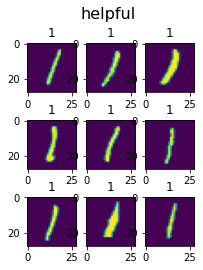

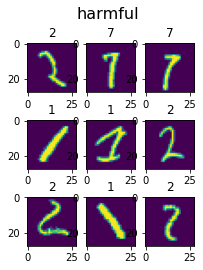

In [9]:
fig = plt.figure(figsize=(3, 4))
fig.suptitle('helpful', fontsize=16)
for i in range(1,10):
    fig.add_subplot(3,3,i)
    plt.imshow(trainset_sampled[data_true['helpful'][i]][0])
    plt.title(trainset_sampled[data_true['helpful'][i]][1])
fig = plt.figure(figsize=(3, 4))
fig.suptitle('harmful', fontsize=16)
for i in range(1,10):
    fig.add_subplot(3,3,i)
    plt.imshow(trainset_sampled[data_true['harmful'][i]][0])
    plt.title(trainset_sampled[data_true['harmful'][i]][1])

In [28]:
def draw_target(path, bot = 0, top = 1):
    target_path = path
    with open (target_path, "r") as f:
         data_target = json.loads(f.read())
    fig = plt.figure(figsize=(3, 4))
    fig.suptitle('helpful', fontsize=16)
    for i in range(1,10):
        fig.add_subplot(3,3,i)
        plt.imshow(trainset_sampled[data_target['helpful'][i]][0])
        plt.title(trainset_sampled[data_target['helpful'][i]][1])
    fig = plt.figure(figsize=(3, 4))
    fig.suptitle('harmful', fontsize=16)
    for i in range(1,10):
        fig.add_subplot(3,3,i)
        plt.imshow(trainset_sampled[data_target['harmful'][i]][0])
        plt.title(trainset_sampled[data_target['harmful'][i]][1])
    plt.show()
    plt.clf()
    bot = int(len(data_target['influence']) * bot)
    top = int(len(data_target['influence']) * top)
    ind = np.argsort(data_target['influence'])[bot:top]
    x =  np.array(data_true['influence'])[ind]
    y = np.array(data_target['influence'])[ind]
    Correlation = round(np.corrcoef(x,y)[0,1],3)
    plt.scatter(y,x)
    plt.title(f"correlation {Correlation}")
    plt.show()

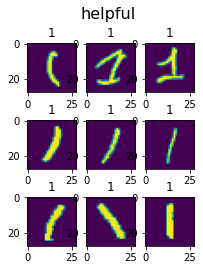

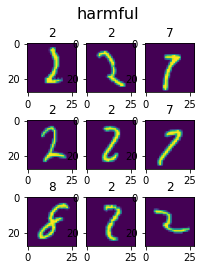

[109 161 131 105 112 113 179 165 121 148 169 170 556 903 199 120 154 174
 124 134 122 143 160 990 132 350 145 119 116 184 126 363 129 166 149 144
 156 192 127 136 182 869 197 168 142 155 157 159 931 123 139 147 187 976
 198 107 163 102 133 110 520 146 100 104 447 399 185 137 396 162 176 106
 164 495 194 118 332 841 171 138 167 158 964 177 128 981 351 188 150 172
 151 173 115 642 130 189 152 111 364 598 913 141 125 186 395 181 593 887
 135 940 175 195 103 658 322 153 196 908 117 932 108 180 190 193 140 901
 183 334 114 934 618 191 871 998 101 927 327 804 178 988 832 909 949 487
 904  26 356  23 492 505 479 910 982 438 320 926 845 528 811 579 938 478
 924 930 592  89 670 342 539 968 388 919 583 851 580 928 674 685 803 935
 649 549 353 902 338 654 972 849 678 987 957 951 994 493  64 541 582 683
 597 543 472 762 921 548 963 937 918 944 533 403 486 925 392 500 950 916
  57 620 468 560  71 939 915  27 993 449 995 983 647 650 429 630 456 923
  66 966  13 651 911 880 980 652 445 603 410 917  9

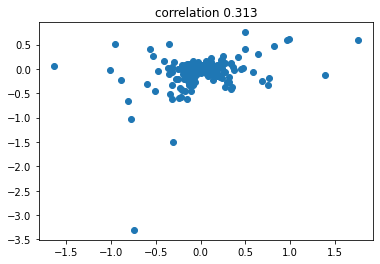

In [25]:
draw_target(f'outputs/mnist/{model}/dev_id_{dev_id_num}/pretrain100epoch/Identity.json')

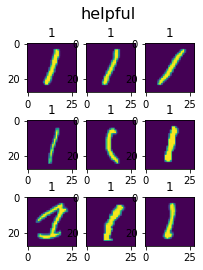

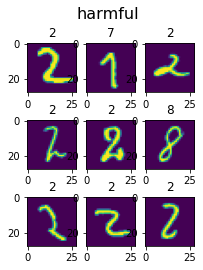

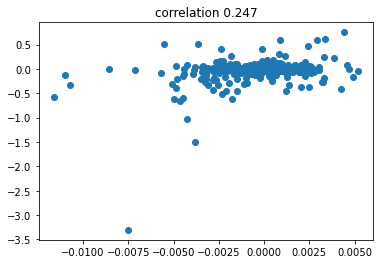

In [71]:
draw_target(f'outputs/mnist/{model}/dev_id_{dev_id_num}/pretrain100epoch/first_iteration_grad.json')

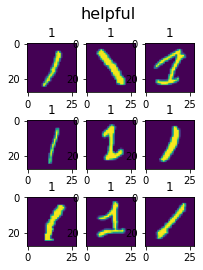

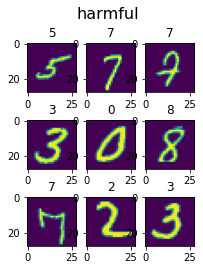

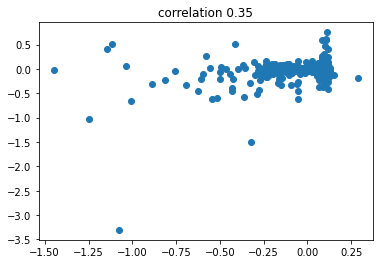

In [73]:
draw_target(f"outputs/mnist/{model}/dev_id_{dev_id_num}/pretrain100epoch/hashmap_IF/epoch42.json",0, 1)

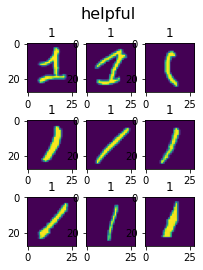

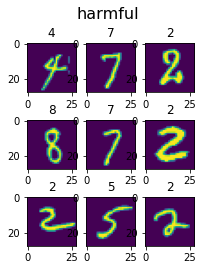

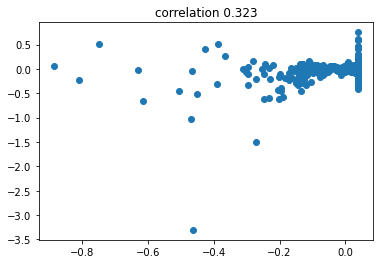

In [87]:
draw_target(f"outputs/mnist/{model}/dev_id_{dev_id_num}/pretrain10epoch/hashmap_IF/epoch299.json",)

In [20]:
draw_target(f"outputs/mnist/MNIST_1/dev_id_{dev_id_num}/pretrain40epoch/first_iteration_grad_2022-08-16-22-40-35.json")

FileNotFoundError: [Errno 2] No such file or directory: 'outputs/mnist/MNIST_1/dev_id_1/pretrain40epoch/first_iteration_grad_2022-08-16-22-40-35.json'

In [63]:
x = [5,6,7,8,9,-1000]
y = [10,12,14,16,18,1000]

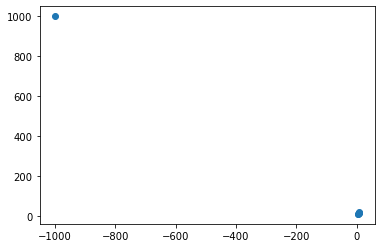

In [64]:
plt.scatter(x,y)

In [65]:
np.corrcoef(x,y)[0][1]

-0.9999452270286089

In [55]:
x.

AttributeError: 'numpy.ndarray' object has no attribute 'append'